World Balanced Portfolio
----------------------------------------

In [5]:
# If you would like to refresh your data, please execute the bellow codes.

import pandas as pd
import numpy as np
from datetime import datetime
from tqdm import tqdm
import matplotlib.pyplot as plt
from mypo import split_k_folds, select_by_regression
from mypo.optimizer import RiskParityOptimizer
from mypo.rebalancer import MonthlyRebalancer
from mypo.evacuator import FixedEvacuator
from mypo import Runner

from mypo import Loader

DOWNLOAD = False

if DOWNLOAD:
    loader = Loader()
    loader.get('VTI', 0.05 * 10e-3) # market
    
    loader.get('VB', 0.08 * 10e-3) # size
    
    loader.get('VTX', 0.08 * 10e-3) # value
    
    loader.get('VBR', 0.08 * 10e-3) # size - value
    
    loader.get('MTUM', 0.15 * 10e-3) # momentum
    
    loader.get('QUAL', 0.15 * 10e-3) # quality
    
    loader.get('IEF', 0.15 * 10e-3)

    
    loader.get('DBV', 0.76 * 10e-3) # carry
    
    loader.get('SPY', 0.09 * 10e-3)
    loader.get('TLT', 0.15 * 10e-3)
    loader.get('GLD', 0.4 * 10e-3)
    loader.save('/app/docs/tutorial/factor_portfolio.bin')

loader = Loader.load('/app/docs/tutorial/factor_portfolio.bin')
factor_market = loader.filter(['VTI', 'VBR', 'MTUM', 'QUAL', 'TLT', 'DBV']).get_market()
us_market = loader.filter(['SPY', 'IEF', 'TLT', 'GLD']).get_market()

Factor Investement 
------------------------

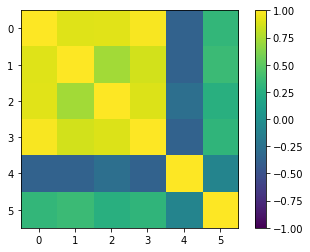

,VTI,VBR,MTUM,QUAL,TLT,DBV
VTI,1.000000,0.899456,0.912506,0.978668,-0.369992,0.326423
VBR,0.899456,1.000000,0.725450,0.862737,-0.372436,0.359811
MTUM,0.912506,0.725450,1.000000,0.895919,-0.270928,0.258185
QUAL,0.978668,0.862737,0.895919,1.000000,-0.367195,0.307280
TLT,-0.369992,-0.372436,-0.270928,-0.367195,1.000000,-0.096827
DBV,0.326423,0.359811,0.258185,0.307280,-0.096827,1.000000


In [6]:
corr = factor_market.get_rate_of_change().corr()

plt.figure()
plt.imshow(corr,interpolation='nearest',vmin=-1,vmax=1,cmap='viridis')
plt.colorbar()
plt.show()

corr

100%|██████████| 1842/1842 [00:25<00:00, 73.60it/s]


,tickers,yearly total return,sharpe ratio,max draw down,max draw down span
0,"[VTI, VBR, MTUM, QUAL, TLT, DBV]",1.076783,0.697602,0.815822,303


,return,std,sharpe ratio,draw down
2014-12-31,0.079350,0.051691,1.148168,0.966899
2015-12-31,-0.025128,0.075611,-0.596849,0.914493
2016-12-31,0.083227,0.064894,0.974306,0.921371
2017-12-31,0.094777,0.041735,1.791732,0.979006
2018-12-31,-0.029026,0.079609,-0.615840,0.907386
2019-12-31,0.174661,0.055071,2.808378,0.927131
2020-12-31,0.122672,0.147573,0.695735,0.815822
2021-12-31,0.074766,0.077737,0.704503,0.962382


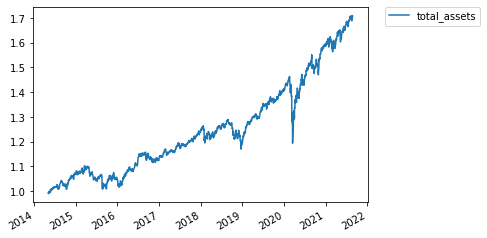

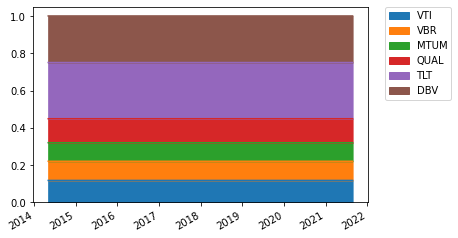

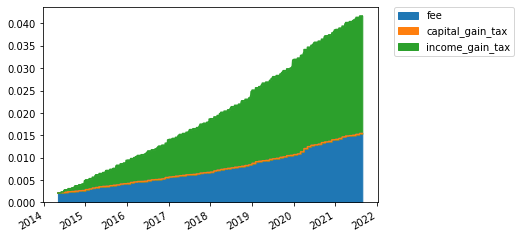

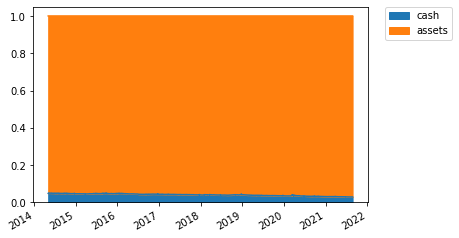

In [2]:
folds = split_k_folds(factor_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer()
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()


Traditonal Asset Class
------------------------

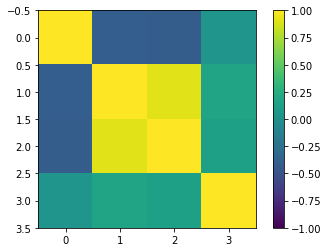

,SPY,IEF,TLT,GLD
SPY,1.000000,-0.401425,-0.412393,0.042148
IEF,-0.401425,1.000000,0.910479,0.171212
TLT,-0.412393,0.910479,1.000000,0.137708
GLD,0.042148,0.171212,0.137708,1.000000


In [7]:
corr = us_market.get_rate_of_change().corr()

plt.figure()
plt.imshow(corr,interpolation='nearest',vmin=-1,vmax=1,cmap='viridis')
plt.colorbar()
plt.show()

corr

100%|██████████| 4021/4021 [00:49<00:00, 80.49it/s]


,tickers,yearly total return,sharpe ratio,max draw down,max draw down span
0,"[SPY, IEF, TLT, GLD]",1.08535,0.612311,0.690173,725


,return,std,sharpe ratio,draw down
2005-12-31,0.038527,0.065600,0.282424,0.967056
2006-12-31,0.099910,0.069779,1.145188,0.934181
2007-12-31,0.091324,0.093349,0.764063,0.951485
2008-12-31,-0.166027,0.210794,-0.882507,0.708218
2009-12-31,0.143934,0.148219,0.836153,0.690173
2010-12-31,0.134603,0.096308,1.189962,0.907491
2011-12-31,0.085352,0.112998,0.578347,0.927817
2012-12-31,0.110067,0.070698,1.273962,0.957250
2013-12-31,0.080048,0.073903,0.812523,0.943075
2014-12-31,0.114662,0.059627,1.587555,0.960703


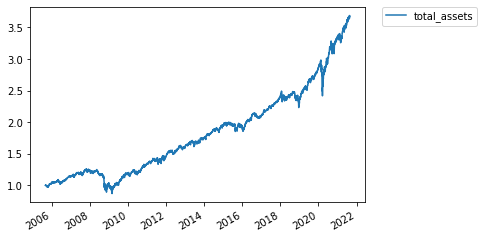

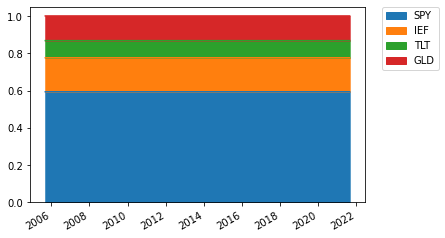

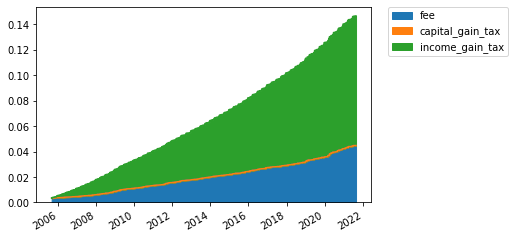

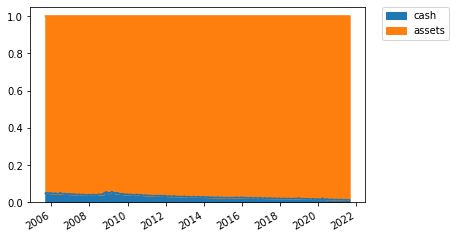

In [3]:
folds = split_k_folds(us_market, 1, 200)
fold = folds[0]

optimizer = RiskParityOptimizer(risk_target=[0.85, 0.05, 0.05, 0.05])
runner = Runner(
    rebalancer=MonthlyRebalancer(optimizer=optimizer, evacuator=FixedEvacuator(level=0.05)),
)

runner.run(
    fold=fold,
    verbose=True
)
report = runner.report()
display(report.summary())
display(report.annual_summary())
ax = report.history_assets().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_weights().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cost().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()
ax = report.history_cash_vs_assets().plot.area(stacked=True)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

